In [191]:
import requests
import apimoex
import ts2vg as ts
from igraph import *
import numpy as np
import networkx as nx
import igraph as ig
import cairocffi
import matplotlib.pyplot as plt
import pandas as pd
import dill
import json
from scipy import stats
import scipy
import statsmodels.api as sm
from scipy.stats import spearmanr
import datetime

In [25]:
ofz_path = './data/ofz_bonds'
with open(ofz_path, 'rb') as file:
    ofz = json.load(file)
bonds_set = set([bond[0] for bond in ofz['securities']['data']])
drop_set = set( ['SU29013RMFS8', 'SU29014RMFS6', 'SU29015RMFS3',
           'SU29016RMFS1', 'SU29017RMFS9', 'SU29018RMFS7',
           'SU29019RMFS5', 'SU29020RMFS3', 'SU29021RMFS1',
           'SU29022RMFS9', 'SU29024RMFS5', 'SU29024RMFS5',
           'SU29025RMFS2', 'SU46011RMFS1', 'SU46012RMFS9',
           'SU46023RMFS6', 'SU25085RMFS0', 'SU26231RMFS9'] )
selected_bonds = list( bonds_set - drop_set )

In [28]:
bonds = {}
for bond in selected_bonds:
    try:
        with open(f'./data/{bond}', 'rb') as file:
            loaded_bond = dill.load(file)
    except:
        print(bond)
    bonds[bond] = loaded_bond

SU25085RMFS0
SU26231RMFS9


In [37]:
cb_ir = pd.read_csv('data.csv', delimiter=';', header=None)
cb_ir.columns = ['TRADEDATE', 'IR']
cb_ir.set_index('TRADEDATE', inplace=True)
cb_ir.index = pd.to_datetime(cb_ir.index, dayfirst=True)

In [38]:
for bond in selected_bonds:
    bonds[bond]['market_data'].index = pd.to_datetime( bonds[bond]['market_data'].index )
    bonds[bond]['market_data'] = bonds[bond]['market_data'].sort_index()
    
    for date in cb_ir.index[::-1]:
        try:
            bonds[bond]['market_data'].loc[date:, 'IR'] = cb_ir.loc[date][0] / 100
        except:
            continue  

In [101]:
with open('./data/bonds_dict', 'wb') as dict_file:
    dill.dump(loaded_dict, dict_file)

In [102]:
with open('./data/bonds_dict', 'rb') as dict_file:
    loaded_dict = dill.load(dict_file)

In [91]:
with open('./data/usdrub', 'rb') as usd_rub_f:
    usd_rub_df = dill.load(usd_rub_f)

<Axes: xlabel='TRADEDATE'>

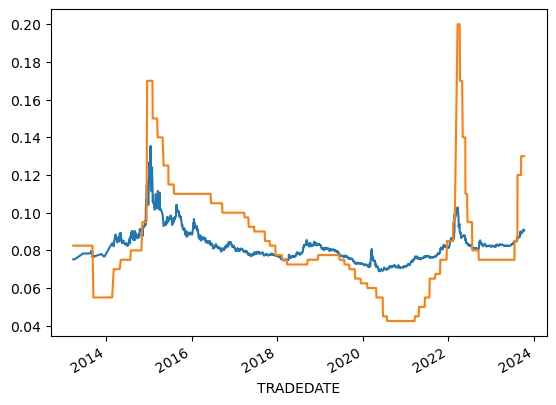

In [103]:
loaded_dict['SU26207RMFS9']['market_data'].dropna()['PROFITABILITY'].plot()
loaded_dict['SU26207RMFS9']['market_data'].dropna()['IR'].plot()

In [112]:
loaded_dict['SU26207RMFS9']['maturity']

'2027-02-03'

In [134]:
loaded_dict['SU25085RMFS0']['market_data']['PROFITABILITY'] = loaded_dict['SU25085RMFS0']['periodicity'] * loaded_dict['SU25085RMFS0']['coupon'] / loaded_dict['SU25085RMFS0']['market_data']['CLOSE'] / 10

<Axes: xlabel='TRADEDATE'>

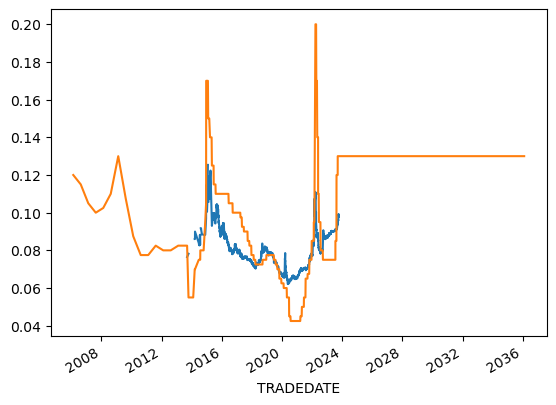

In [137]:
loaded_dict['SU25085RMFS0']['market_data']['PROFITABILITY'].plot()
loaded_dict['SU25085RMFS0']['market_data']['IR'].plot()

In [198]:
sep_date_1 = pd.Timestamp('2017-01-01')

common_timeline = loaded_dict['SU25085RMFS0']['market_data'].index
all_bonds_df = {}
all_bonds_df['profitability'] = pd.DataFrame(index=common_timeline) 
for bond, b_info in loaded_dict.items():
    if b_info['market_data'].dropna().index[0] < sep_date_1:
        all_bonds_df['profitability'][bond] = b_info['market_data']['PROFITABILITY'].dropna()
        print(bond, b_info['offering'], b_info['maturity'])
        # b_info['market_data']['PROFITABILITY'].plot(label=bond)
# plt.legend()

SU29006RMFS2 31.12.2014 2025-01-29
SU29008RMFS8 31.12.2014 2029-10-03
SU29009RMFS6 31.12.2014 2032-05-05
SU26219RMFS4 29.06.2016 2026-09-16
SU29010RMFS4 31.12.2014 2034-12-06
SU26212RMFS9 23.01.2013 2028-01-19
SU26218RMFS6 28.10.2015 2031-09-17
SU26207RMFS9 22.02.2012 2027-02-03
SU46020RMFS2 15.02.2006 2036-02-06
SU25085RMFS0 15.02.2006 2036-02-06
SU29007RMFS0 31.12.2014 2027-03-03


In [199]:
sep_date_2 = pd.Timestamp('2017-01-01')
last_available_date = loaded_dict['SU25085RMFS0']['market_data']['CLOSE'].dropna().index[-1]

In [200]:
last_available_date

Timestamp('2023-10-11 00:00:00')

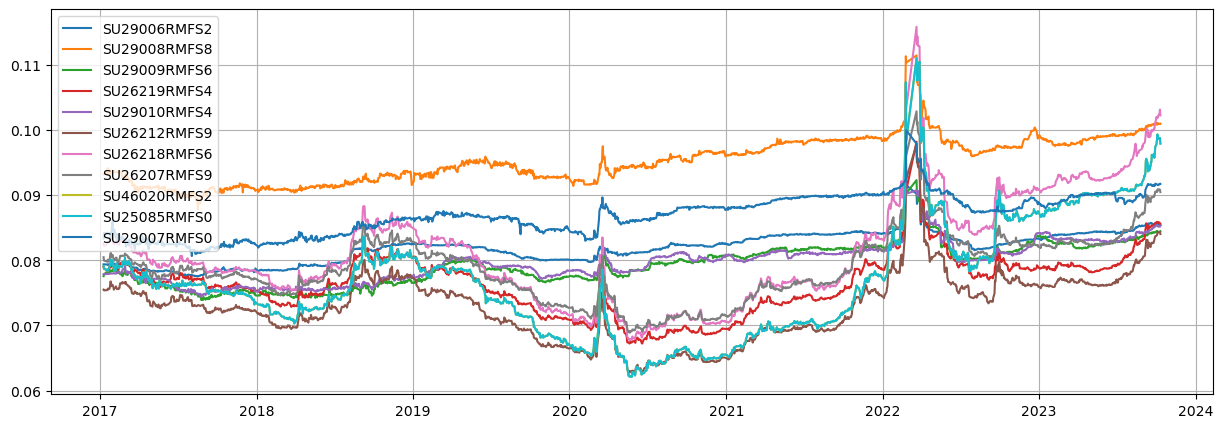

In [201]:
plt.figure(figsize=(15,5))
_ = plt.plot(all_bonds_df['profitability'].loc[sep_date_2:].dropna(), label=all_bonds_df['profitability'].columns)
plt.grid()
plt.legend()

In [202]:
sep_date_1 = pd.Timestamp('2017-01-01')

common_timeline = loaded_dict['SU25085RMFS0']['market_data'].index
all_bonds_df = {}
all_bonds_df['profitability'] = pd.DataFrame(index=common_timeline) 
for bond, b_info in loaded_dict.items():
    if b_info['market_data'].dropna().index[0] < sep_date_1:
        date_diff = pd.to_datetime(b_info['maturity']).to_datetime64() - last_available_date.to_datetime64()
        print(bond, b_info['offering'], b_info['maturity'], round(pd.Timedelta( date_diff ).days / 365.25, 1) )

SU29006RMFS2 31.12.2014 2025-01-29 1.3
SU29008RMFS8 31.12.2014 2029-10-03 6.0
SU29009RMFS6 31.12.2014 2032-05-05 8.6
SU26219RMFS4 29.06.2016 2026-09-16 2.9
SU29010RMFS4 31.12.2014 2034-12-06 11.2
SU26212RMFS9 23.01.2013 2028-01-19 4.3
SU26218RMFS6 28.10.2015 2031-09-17 7.9
SU26207RMFS9 22.02.2012 2027-02-03 3.3
SU46020RMFS2 15.02.2006 2036-02-06 12.3
SU25085RMFS0 15.02.2006 2036-02-06 12.3
SU29007RMFS0 31.12.2014 2027-03-03 3.4


10.080766598220396

In [175]:
b_info['maturity']

'2025-01-29'